# Linear Regression Analysis - IMPROVED

## Setup

In [21]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import shap

%matplotlib inline 

In [2]:
# Load data
data = pd.read_csv('data/ames_lr.csv')

In [3]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [4]:
# Check the columns in predictors
column_names = predictors.columns.tolist()
for column in column_names:
    print(column)


GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Remod
YrSoldLessBuilt
YrSoldLessRemod
Crisis
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighbo

## Split Data into Train-Test Sets

In [5]:
# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [6]:
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
1138,1792,80.0,12435,7,5,172.0,4,3,361.0,0.0,...,0,0,0,0,1,0,0,0,0,0
411,864,0.0,8499,5,6,0.0,3,3,660.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2301,1595,60.0,7200,6,8,0.0,3,5,338.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1697,1692,0.0,9337,7,5,0.0,3,3,353.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1347,1720,65.0,10816,9,5,364.0,5,3,1104.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train.head()

1138    231500
411     141000
2301    155500
1697    191000
1347    332000
Name: SalePrice, dtype: int64

## Data Prep and Feature Selection for Train Set

Linear Regression has several key assumptions:
1. **Linearity** - there should be a linear relationship between the independent (predictor) variables and the dependent (response) variable
2. **Independence of Errors** - residuals should be independent of each other with no correlation
3. **Homoscedasticity** - residuals should have constant variance across the range of predicted values
4. **Normality of errors** - residuals should be approximiately normally distributed
5. **No or little multicollinearity** - independent variables should not be highly correlated with each other

From our EDA, we already know that the full dataset has signifiicant multicollinearity.  As a result, we will build the feature set "bottoms up."  We'll use the analysis done in the EDA to select these.  To create a parsimonious model, we'll only pick the features that seem to show high correlation to the target variable.

In [8]:
# Create linear regression object
lr = LinearRegression()

# 'GarageCars' - show linear regression for GarageCars
lr.fit(X_train[['GarageCars']], y_train)
print("GarageCars R^2 score: ", lr.score(X_train[['GarageCars']], y_train))

# 'GrLivArea' - show linear regression for GrLivArea
lr.fit(X_train[['GrLivArea']], y_train)
print("GrLivArea R^2 score: ", lr.score(X_train[['GrLivArea']], y_train))

# 'Neighborhood' - show linear regression for encoded Neighborhood
neighborhood_columns = [col for col in predictors.columns if col.startswith('Neighborhood')]
lr.fit(X_train[neighborhood_columns], y_train)
print("Neighborhood (one-hot encoded) R^2 score: ", lr.score(X_train[neighborhood_columns], y_train))

# 'OverallQual' - show linear regression for OverallQual
lr.fit(X_train[['OverallQual']], y_train)
print("OverallQual R^2 score: ", lr.score(X_train[['OverallQual']], y_train))

# 'TotalBsmtSF' - show linear regression for TotalBsmtSF
lr.fit(X_train[['TotalBsmtSF']], y_train)
print("TotalBsmtSF R^2 score: ", lr.score(X_train[['TotalBsmtSF']], y_train))

# 'YrSoldLessBuilt' - show linear regression for YrSoldLessBuilt
lr.fit(X_train[['YrSoldLessBuilt']], y_train)
print("YrSoldLessBuilt R^2 score: ", lr.score(X_train[['YrSoldLessBuilt']], y_train))

GarageCars R^2 score:  0.4011518970204133
GrLivArea R^2 score:  0.5254389934847536
Neighborhood (one-hot encoded) R^2 score:  0.5658084091604905
OverallQual R^2 score:  0.6286470107557833
TotalBsmtSF R^2 score:  0.42890898177021497
YrSoldLessBuilt R^2 score:  0.2945733578968881


In [9]:
# Gather selected features for training set
X_train = pd.concat([X_train[['GarageCars']],
                     X_train[['GrLivArea']],
                     X_train[neighborhood_columns],
                     X_train[['OverallQual']],
                     X_train[['TotalBsmtSF']],
                     X_train[['YrSoldLessBuilt']]],
                     axis=1)

print(X_train.columns)

Index(['GarageCars', 'GrLivArea', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual',
       'TotalBsmtSF', 'YrSoldLessBuilt'],
      dtype='object')


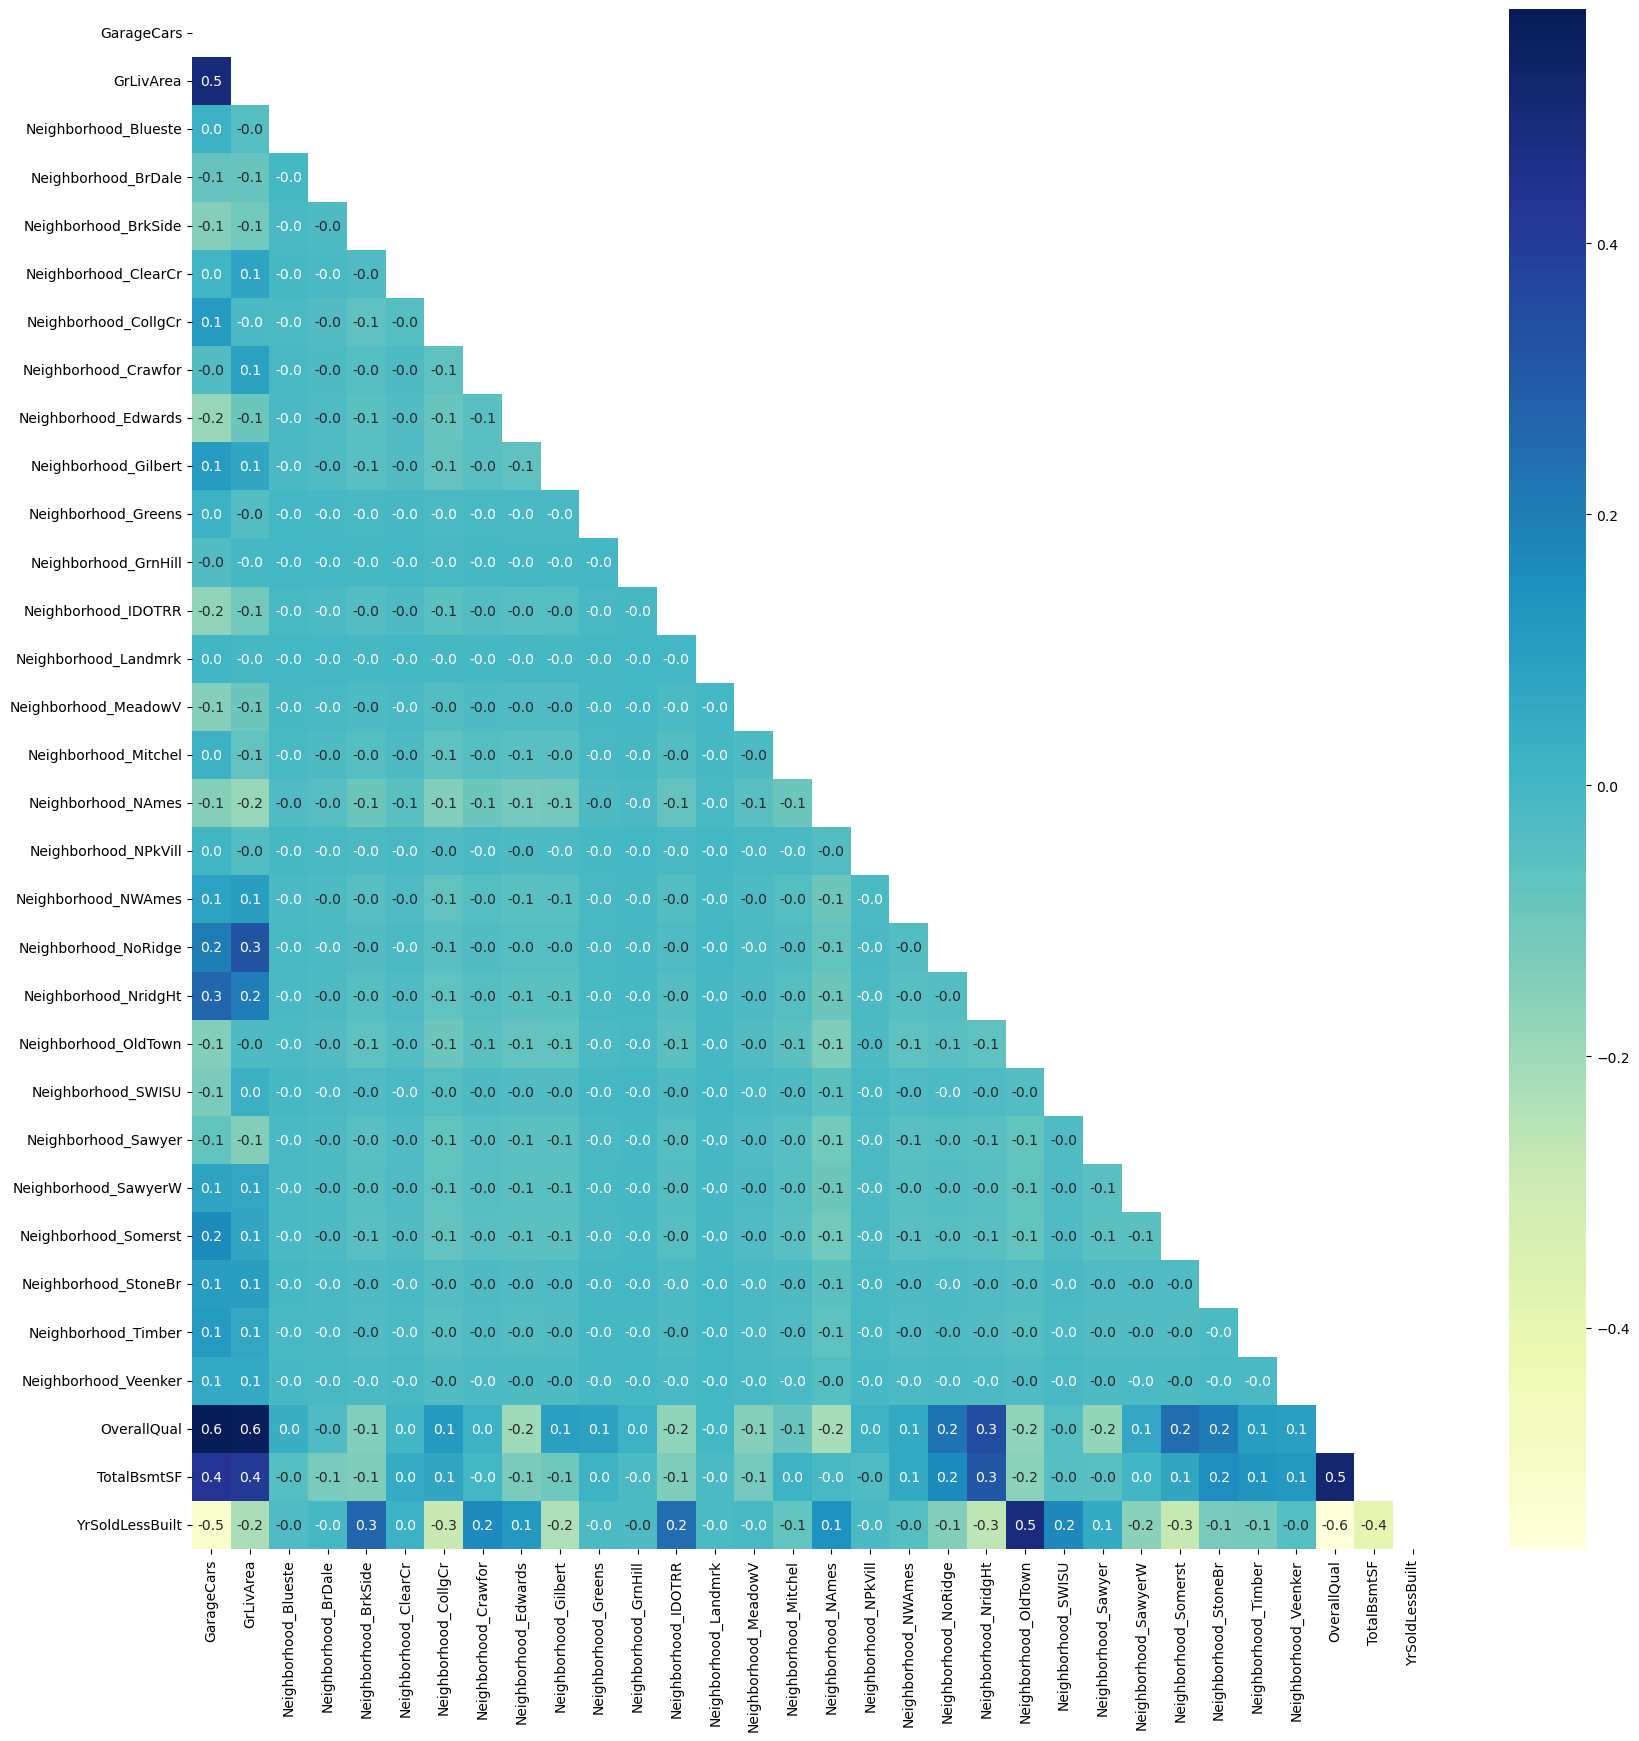

In [10]:
# Plot the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask to hide upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the figure
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.1f', cmap = 'YlGnBu')

# Show the plot
plt.show()

In [11]:
# Calculate the VIF for each feature in the selected_features DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i)
              for i in range(X_train.shape[1])]

# Add the feature names to the VIF DataFrame
vif['Feature'] = X_train.columns

# Sort the VIF DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF DataFrame
print(vif)

          VIF               Feature
29  48.486183           OverallQual
1   20.082077             GrLivArea
31  12.713431       YrSoldLessBuilt
0   12.359196            GarageCars
30  12.078717           TotalBsmtSF
16   8.148938    Neighborhood_NAmes
21   7.182033  Neighborhood_OldTown
6    4.529905  Neighborhood_CollgCr
20   3.763497  Neighborhood_NridgHt
25   3.657031  Neighborhood_Somerst
4    3.598948  Neighborhood_BrkSide
8    3.565819  Neighborhood_Edwards
7    3.471199  Neighborhood_Crawfor
9    3.237403  Neighborhood_Gilbert
23   3.084805   Neighborhood_Sawyer
18   3.049219   Neighborhood_NWAmes
24   2.897104  Neighborhood_SawyerW
12   2.810616   Neighborhood_IDOTRR
19   2.690436  Neighborhood_NoRidge
15   2.391240  Neighborhood_Mitchel
22   2.096158    Neighborhood_SWISU
27   1.965831   Neighborhood_Timber
26   1.937997  Neighborhood_StoneBr
5    1.816008  Neighborhood_ClearCr
28   1.547254  Neighborhood_Veenker
3    1.450931   Neighborhood_BrDale
14   1.337717  Neighborhood_

Multicollinearity has improved, but we still have some high values, so the caveat is that the model's predictions may not be reliable.  We'll address this via regularization in later modules.

In [12]:
# Transform target into log(SalePrice)
y_train = np.log(y_train)

# Check the transformed target
y_train.head()

1138    12.352335
411     11.856515
2301    11.954401
1697    12.160029
1347    12.712890
Name: SalePrice, dtype: float64

## Data Prep and Feature Selection for Test Set

In [13]:
# Gather selected features for test set
X_test = pd.concat([X_test[['GarageCars']],
                    X_test[['GrLivArea']],
                    X_test[neighborhood_columns],
                    X_test[['OverallQual']],
                    X_test[['TotalBsmtSF']],
                    X_test[['YrSoldLessBuilt']]],
                    axis=1)

print(X_test.columns)   

Index(['GarageCars', 'GrLivArea', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual',
       'TotalBsmtSF', 'YrSoldLessBuilt'],
      dtype='object')


In [14]:
# Tranform test set using log transformation
y_test = np.log(y_test)

## Train Model

In [15]:
# Use cross-validation on train data
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Average 5-Fold CV Score: {np.mean(cross_val_scores)}")

Average 5-Fold CV Score: 0.8683622368608164


In [16]:
# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [17]:
# Display the metrics
print('R^2 on test set is equal to %.3f' %(lr.score(X_test, y_test)))
print('The intercept is equal to %.3f' %(lr.intercept_))
print('The slopes are %s' %(lr.coef_))

R^2 on test set is equal to 0.883
The intercept is equal to 10.834
The slopes are [ 5.22021828e-02  2.62233061e-04 -6.41515707e-02 -1.66001800e-01
  3.04101061e-02  1.72903534e-01  6.21511192e-02  1.98264397e-01
  1.85464349e-02  5.57378971e-02  5.73707702e-02  5.33622919e-01
 -1.06685873e-01 -8.75676843e-02 -1.25067324e-01  6.09218496e-02
  5.22907063e-02 -7.16549676e-02  3.35959947e-02  1.14852570e-01
  1.14908601e-01 -2.33795618e-02 -2.37903574e-02  6.08251245e-02
  2.67415247e-02  7.49676340e-02  1.24576454e-01  1.10188632e-01
  1.31319490e-01  9.23788793e-02  1.61722199e-04 -1.94395006e-03]


Text(0.5, 1.0, 'Distribution of Residuals')

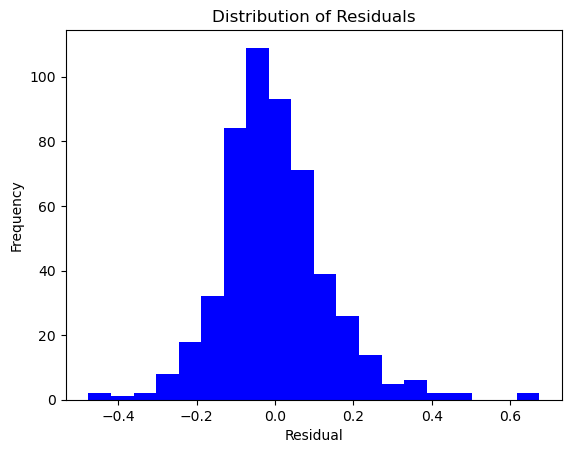

In [18]:
# Plot Distribution of Residuals

# Calculate the predictions on the test set
predictions = lr.predict(X_test)

# Calculate the residuals
residuals = predictions - y_test

# Plot a histogram of the residuals
plt.hist(residuals, bins=20, color='blue')

# Labels and title
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

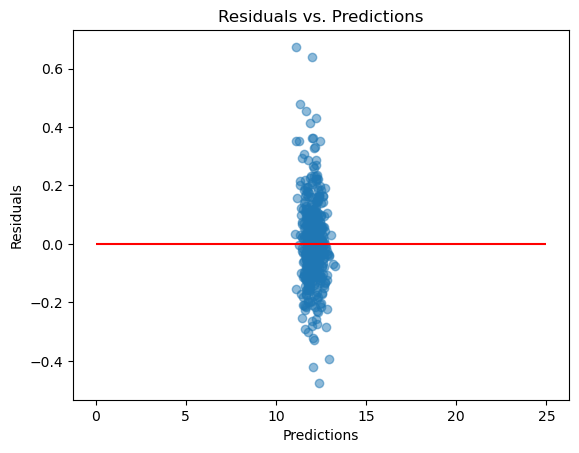

In [19]:
# Plot Residuals vs. Predictions

# Create the plot
plt.scatter(predictions, residuals, alpha=0.5)

# Labels and title
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')

# Draw a horizontal line at y = 0
plt.hlines(y=0, xmin=0, xmax=25, color='red')

# Show the plot
plt.show()

## Shapley Values

In [22]:
# Compute the SHAP values for the linear model
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_train)

In [23]:
# Summarize the SHAP values in a DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

In [24]:
# Get the mean absolute SHAP value for each feature
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

In [25]:
# Print the top 5 features
print(mean_shap_values.head(5))

GrLivArea          0.105814
OverallQual        0.103943
TotalBsmtSF        0.051828
YrSoldLessBuilt    0.048257
GarageCars         0.027989
dtype: float64


In [27]:
# Print total number of features
print('Total number of features: ', len(mean_shap_values))

Total number of features:  32


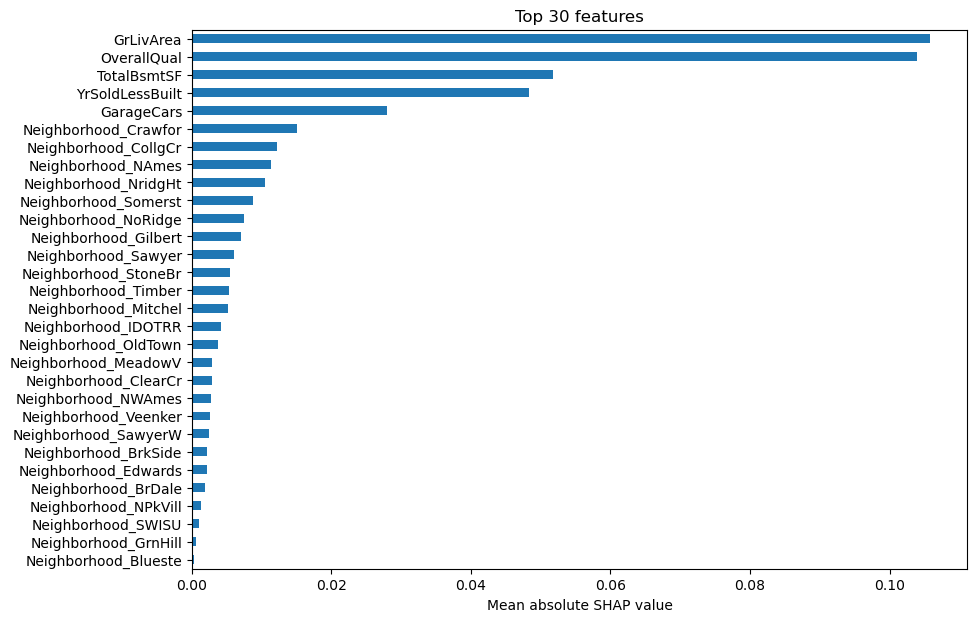

In [26]:
# Plot the top 30 features
mean_shap_values.head(30).plot(kind='barh', figsize=(10, 7))
plt.xlabel('Mean absolute SHAP value')
plt.title('Top 30 features')
plt.gca().invert_yaxis()
plt.show()